In [50]:
import numpy as np 
import pandas as pd 

In [51]:
df = pd.read_csv("Churn_Modelling.csV")
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [52]:
df= df.drop(columns = ["RowNumber","CustomerId", "Surname"])

In [53]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CreditScore      10000 non-null  int64  
 1   Geography        10000 non-null  object 
 2   Gender           10000 non-null  object 
 3   Age              10000 non-null  int64  
 4   Tenure           10000 non-null  int64  
 5   Balance          10000 non-null  float64
 6   NumOfProducts    10000 non-null  int64  
 7   HasCrCard        10000 non-null  int64  
 8   IsActiveMember   10000 non-null  int64  
 9   EstimatedSalary  10000 non-null  float64
 10  Exited           10000 non-null  int64  
dtypes: float64(2), int64(7), object(2)
memory usage: 859.5+ KB


In [54]:
from sklearn.preprocessing import OneHotEncoder

In [55]:
X =  df.iloc[: , :-1]

In [56]:
y=df["Exited"]

In [57]:
y

0       1
1       0
2       1
3       0
4       0
       ..
9995    0
9996    0
9997    1
9998    1
9999    0
Name: Exited, Length: 10000, dtype: int64

In [58]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [59]:
X_train.shape

(8000, 10)

In [60]:
y_train.shape

(8000,)

In [61]:
X_train.head(2)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
9254,686,France,Male,32,6,0.0,2,1,1,179093.26
1561,632,Germany,Male,42,4,119624.6,2,1,1,195978.86


In [62]:
X_train = pd.get_dummies(X_train , columns=["Geography", "Gender"], drop_first= True )

In [63]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8000 entries, 9254 to 7270
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CreditScore        8000 non-null   int64  
 1   Age                8000 non-null   int64  
 2   Tenure             8000 non-null   int64  
 3   Balance            8000 non-null   float64
 4   NumOfProducts      8000 non-null   int64  
 5   HasCrCard          8000 non-null   int64  
 6   IsActiveMember     8000 non-null   int64  
 7   EstimatedSalary    8000 non-null   float64
 8   Geography_Germany  8000 non-null   bool   
 9   Geography_Spain    8000 non-null   bool   
 10  Gender_Male        8000 non-null   bool   
dtypes: bool(3), float64(2), int64(6)
memory usage: 585.9 KB


In [64]:
X_train.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
9254,686,32,6,0.00,2,1,1,179093.26,False,False,True
1561,632,42,4,119624.60,2,1,1,195978.86,True,False,True
1670,559,24,3,114739.92,1,1,0,85891.02,False,True,True
6087,561,27,9,135637.00,1,1,0,153080.40,False,False,False
6669,517,56,9,142147.32,1,0,0,39488.04,False,False,True


In [65]:
X_test = pd.get_dummies(X_test , columns=["Geography", "Gender"], drop_first= True )

In [66]:
X_test

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geography_Germany,Geography_Spain,Gender_Male
6252,596,32,3,96709.07,2,0,0,41788.37,True,False,True
4684,623,43,1,0.00,2,1,1,146379.30,False,False,True
1731,601,44,4,0.00,2,1,0,58561.31,False,True,False
4742,506,59,8,119152.10,2,1,1,170679.74,True,False,True
4521,560,27,7,124995.98,1,1,1,114669.79,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...
6412,602,53,5,98268.84,1,0,1,45038.29,True,False,False
8285,609,25,10,0.00,1,0,1,109895.16,False,False,True
7853,730,47,7,0.00,1,1,0,33373.26,False,False,False
1095,692,29,4,0.00,1,1,0,76755.99,False,False,True


In [67]:
X_test.shape

(2000, 11)

In [68]:
from sklearn.preprocessing import StandardScaler

In [69]:
scale = StandardScaler()
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

In [70]:
X_train_scaled

array([[ 0.35649971, -0.6557859 ,  0.34567966, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [-0.20389777,  0.29493847, -0.3483691 , ...,  1.72572313,
        -0.57638802,  0.91324755],
       [-0.96147213, -1.41636539, -0.69539349, ..., -0.57946723,
         1.73494238,  0.91324755],
       ...,
       [ 0.86500853, -0.08535128, -1.38944225, ..., -0.57946723,
        -0.57638802, -1.09499335],
       [ 0.15932282,  0.3900109 ,  1.03972843, ..., -0.57946723,
        -0.57638802,  0.91324755],
       [ 0.47065475,  1.15059039, -1.38944225, ...,  1.72572313,
        -0.57638802,  0.91324755]])

In [71]:
import tensorflow
from tensorflow import keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dense, BatchNormalization, Dropout


In [72]:
# relu as activation fucntion 
model = Sequential()
model.add(Dense(11,activation="relu", input_dim = 11, kernel_regularizer= tensorflow.keras.regularizers.l2(0.03)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(11,activation="relu", kernel_regularizer= tensorflow.keras.regularizers.l2(0.03)))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(1,activation="sigmoid"))

C:\Users\guriv\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [73]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_8 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 11)                  │              44 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 11)                  │             132 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 11)                  │              44 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 11)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1)                   │              12 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 364 (1.42 KB)

 Trainable params: 320 (1.25 KB)

 Non-trainable params: 44 (176.00 B)

In [74]:
history = model.compile(optimizer='rmsprop', loss="binary_crossentropy", metrics = ["accuracy"])

In [75]:
history = model.fit(X_train_scaled, y_train, validation_split=0.2, epochs=50)

Epoch 1/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.5892 - loss: 1.3137 - val_accuracy: 0.8012 - val_loss: 0.8184
Epoch 2/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.7575 - loss: 0.8111 - val_accuracy: 0.8087 - val_loss: 0.6259
Epoch 3/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8000 - loss: 0.6341 - val_accuracy: 0.8169 - val_loss: 0.5349
Epoch 4/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8149 - loss: 0.5453 - val_accuracy: 0.8256 - val_loss: 0.4789
Epoch 5/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8132 - loss: 0.5135 - val_accuracy: 0.8369 - val_loss: 0.4411
Epoch 6/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8230 - loss: 0.4646 - val_accuracy: 0.8500 - val_loss: 0.4129
Epoch 7/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8298 - loss: 0.4460 - val_accuracy: 0.8456 - val_loss: 0.4015
Epoch 8/50
200/200 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - accuracy: 0.8360 - loss: 0.4109 - val_accuracy: 0.

In [76]:
model.layers[1].get_weights()

[array([1.0276084, 0.9653366, 0.8000496, 1.2744057, 1.0153099, 0.8233051,
        1.0049953, 0.8334738, 1.0819886, 0.9736022, 1.2784896],
       dtype=float32),
 array([ 0.14127645,  0.11952022,  0.11565241, -0.09308267, -0.09208979,
         0.3634712 , -0.15750171,  0.4567611 ,  0.39638957, -0.00599055,
        -0.08094099], dtype=float32),
 array([0.06235689, 0.17565344, 0.15382284, 0.00526173, 0.0081522 ,
        0.17404535, 0.00751652, 0.15190047, 0.26798132, 0.02269903,
        0.00353683], dtype=float32),
 array([0.00555117, 0.00794031, 0.00811091, 0.00085328, 0.00076883,
        0.00941756, 0.00069928, 0.00945392, 0.01125314, 0.00192441,
        0.00035267], dtype=float32)]

In [77]:
y_log = model.predict(X_test_scaled)

63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step


In [78]:
y_log

array([[0.05172892],
       [0.0443754 ],
       [0.14981876],
       ...,
       [0.75922865],
       [0.12078772],
       [0.37715444]], dtype=float32)

In [79]:
y_pred = np.where(y_log>0.5, 1, 0)

In [80]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.8545

In [81]:
import matplotlib.pyplot as plt

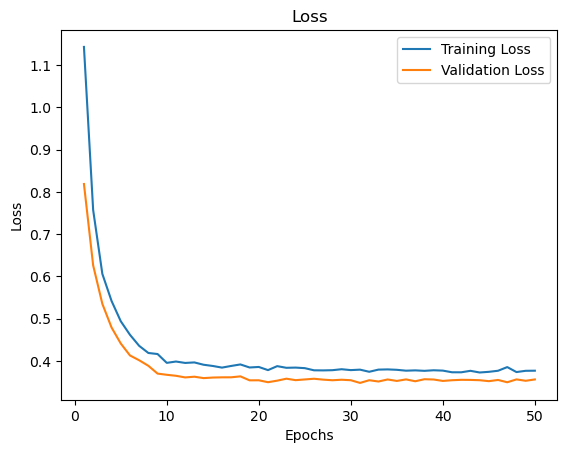

<function matplotlib.pyplot.show(close=None, block=None)>

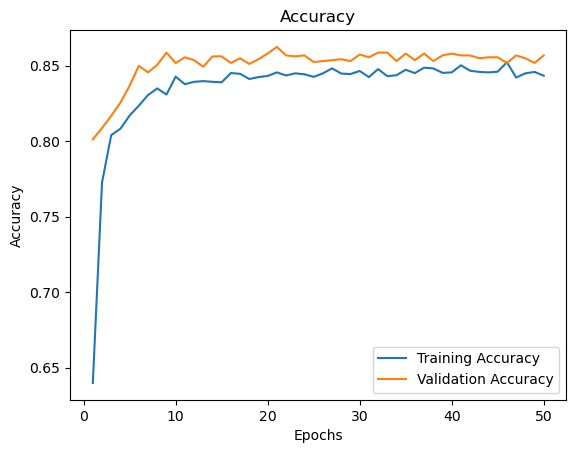

In [82]:
import matplotlib.pyplot as plt

training_loss = history.history['loss']
training_accuracy = history.history['accuracy']
validation_loss = history.history['val_loss']
validation_accuracy = history.history['val_accuracy']


plt.plot(range(1, len(training_loss) + 1), training_loss, label='Training Loss')
plt.plot(range(1, len(validation_loss) + 1), validation_loss, label='Validation Loss')
plt.title('Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()
 
plt.plot(range(1, len(training_accuracy) + 1), training_accuracy, label='Training Accuracy')
plt.plot(range(1, len(validation_accuracy) + 1), validation_accuracy, label='Validation Accuracy')
plt.title('Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show


In [93]:

input_query = pd.DataFrame({
    'CreditScore': [600],
    'Age': [35],
    'Tenure': [5],
    'Balance': [50000],
    'NumOfProducts': [2],
    'HasCrCard': [1],
    'IsActiveMember': [1],
    'EstimatedSalary': [80000],
    'Geography_Germany': [False],
    'Geography_Spain': [True],
    'Gender_Male': [True]
})


input_query_scaled = scale.transform(input_query)


predictions = model.predict(input_query_scaled)

print(predictions)




1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
[[0.02691874]]
